# Problem
Customer churn merupakan salah satu permasalahan yang mempengaruhi keberlanjutan bisnis dalam industri telekomunikasi. Biaya mengakuisisi pelanggan baru jauh lebih tinggi daripada mempertahankan pelanggan yang sudah ada. Maka dari itu mengidentifikasi fitur yang berpengaruh signifikan terhadap customer churn sekaligus memprediksi customer churn penting dilakukan agar dapat memberikan aksi yang tepat sesuai kebutuhan pelanggan sehingga dapat mencegah pelanggan untuk churn.


# Goal
1. Mengetahui penyebab umum pelanggan berhenti menggunakan layanan telekomunikasi.
2. Mencari model klasifikasi terbaik untuk memprediksi status churn pelanggan layanan telekomunikasi.
3. Memprediksi status churn pelanggan layanan telekomunikasi pada unseen data.


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.0 MB/s eta 0:00:00


In [ ]:
#pandas
import pandas as pd
#numpy
import numpy as np

#visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import LabelEncoder

#splitting
from sklearn.model_selection import train_test_split

#standarisasi
from sklearn.preprocessing import StandardScaler

#algoritma klasifikasi
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

#model evaluation
from sklearn.metrics import confusion_matrix, classification_report

#Cross Validation
from sklearn.model_selection import KFold

#feature importance
import shap

#GridSearch
from sklearn.model_selection import GridSearchCV

# Data Understanding
Pada penelitian ini menggunakan data sekunder yang diperoleh dari Kaggle, yaitu Telecom Churn Dataset. Telecom Churn Dataset adalah dataset yang digunakan untuk memprediksi pelanggan yang akan berhenti menggunakan layanan telekomunikasi. Dataset ini berfokus pada masalah churn, yaitu pelanggan yang mengakhiri langganan layanan telekomunikasi. Selain itu, dataset ini terdiri dari data training dan data testing, dimana pelatihan model akan dilakukan pada data train. Selanjutnya, model terbaik yang telah diperoleh pada tahap pelatihan digunakan untuk memprediksi status churn pelanggan pada data test.


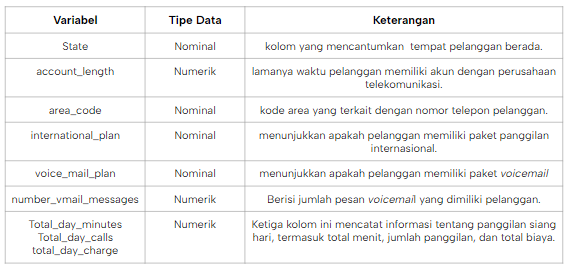

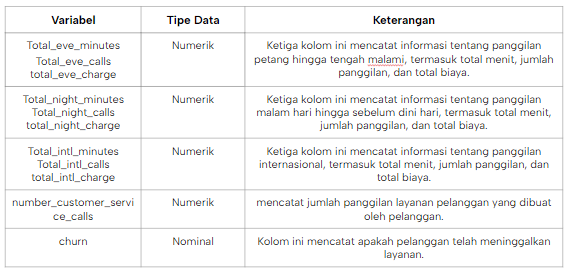

In [ ]:
# data pelatihan
train = pd.read_csv('/content/drive/MyDrive/Startup Campus/FGA Kominfo X Binar/Data Train.csv')

In [ ]:
# data testing
test = pd.read_csv('/content/drive/MyDrive/Startup Campus/FGA Kominfo X Binar/Data Test.csv')

In [ ]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

# Data Preprocessing - EDA

In [ ]:
train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [ ]:
#numerikal data
num = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']

## EDA using sns

### Account Length vs Churn
**Secara deskriptif**, tidak terdapat perbedaan yang signifikan antara pelanggan dengan status churn dan tidak churn dalam hal lamanya waktu pelanggan memiliki akun dengan perusahaan telekomunikasi. Hal ini dapat dilihat dari distribusi variabel account length, mean, dan median yang cenderung sama baik untuk pelanggan dengan status churn dan tidak churn.

<Axes: xlabel='account_length', ylabel='Count'>

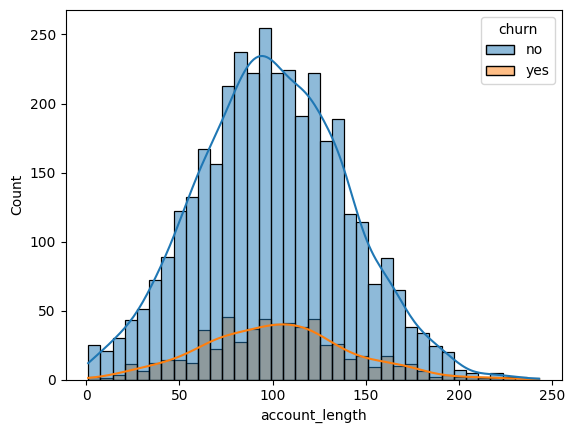

In [ ]:
sns.histplot(data = train, x = 'account_length', hue = 'churn', kde=True)

In [ ]:
train[train['churn']=='yes'].account_length.describe()

count    598.000000
mean     102.137124
std       39.369162
min        2.000000
25%       76.000000
50%      101.000000
75%      125.000000
max      225.000000
Name: account_length, dtype: float64

In [ ]:
train[train['churn']=='no'].account_length.describe()

count    3652.000000
mean       99.924973
std        39.748743
min         1.000000
25%        73.000000
50%        99.000000
75%       127.000000
max       243.000000
Name: account_length, dtype: float64

### Area Code vs Churn
Pada dataset ini pelanggan terbanyak berada pada kode area 415. Namun, proporsi churn terbanyak berada pada kode area 510. Secara deskriptif, terlihat tidak terdapat perbedaan yang signifikan terhadap proporsi churn pada masing-masing kode area, dimana kode area 408, kode area 415, dan kode area 510 memiliki proporsi churn terhadap jumlah pelanggan pada area tersebut secara berurutan 14%, 13.6% dan 15%.

<Axes: xlabel='area_code', ylabel='count'>

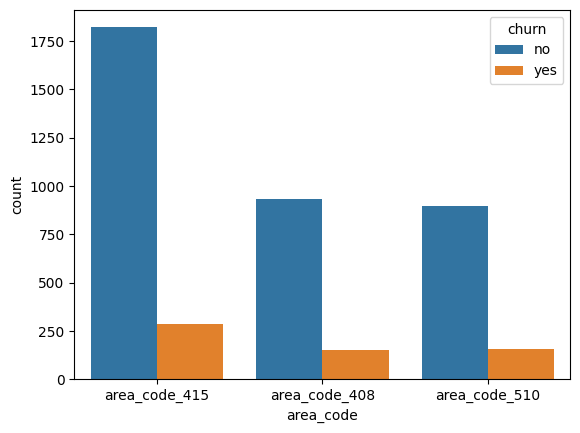

In [ ]:
sns.countplot(data=train, x='area_code', hue='churn')

In [ ]:
train[train['churn'] == 'yes'].area_code.value_counts()

area_code_415    287
area_code_510    159
area_code_408    152
Name: area_code, dtype: int64

In [ ]:
train.area_code.value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

In [ ]:
train[train['churn'] == 'yes'].area_code.value_counts()/train.area_code.value_counts()

area_code_408    0.139963
area_code_415    0.136148
area_code_510    0.150568
Name: area_code, dtype: float64

### International plan vs Churn
Kebanyakan pelanggan tidak memiliki paket panggilan internasional. Namun, pelanggan yang memiliki paket panggilan internasional memiliki tingkat churn yang lebih tinggi daripada pelanggan yang tidak memiliki paket panggilan internasional, dimana proporsi churn pada pelanggan yang memiliki paket panggilan internasional dan pelanggan yang tidak memiliki paket panggilan internasional secara berurutan, 42.2% dan 11.2%

<Axes: xlabel='international_plan', ylabel='count'>

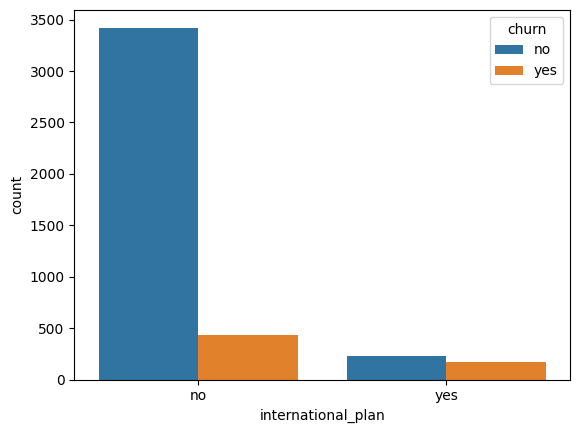

In [ ]:
sns.countplot(data=train, x='international_plan', hue='churn')

In [ ]:
train[train['churn'] == 'yes'].international_plan.value_counts()/train.international_plan.value_counts()

no     0.111832
yes    0.421717
Name: international_plan, dtype: float64

### Voice mail plan vs Churn
Kebanyakan pelanggan tidak memiliki paket voice mail. Secara deskriptif, pelanggan yang tidak memiliki paket voice mail cenderung berpotensi untuk churn. Dimana proporsi churn pada pelanggan yang tidak memiliki paket voice mail dan pelanggan yang memiliki paket voice mail, secara berurutan 16.4% dan 7.4%

<Axes: xlabel='voice_mail_plan', ylabel='count'>

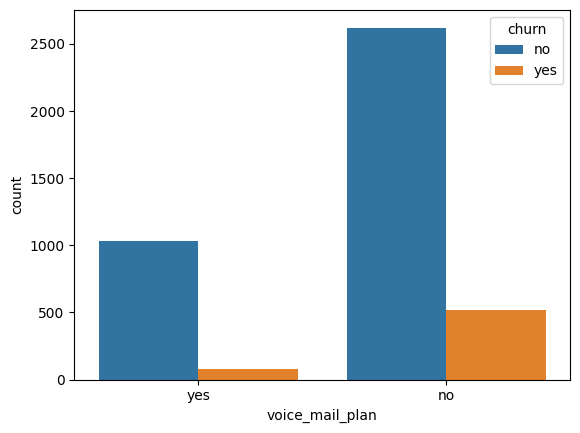

In [ ]:
sns.countplot(data=train, x='voice_mail_plan', hue='churn')

In [ ]:
train[train['churn'] == 'yes'].voice_mail_plan.value_counts()/train.voice_mail_plan.value_counts()

no     0.164436
yes    0.073741
Name: voice_mail_plan, dtype: float64

### Total Day Minutes vs Churn
Berdasarkan histogram dibawah, pelanggan - pelanggan dengan jumlah panggilan siang hari dalam menit yang cenderung tinggi akan berpeluang untuk churn. Selanjutnya, ditinjau dari mean atau median pada variabel total day minutes, pelanggan yang churn cenderung memiliki mean dan median yang lebih tinggi dari pada pelanggan yang tidak churn.


<Axes: xlabel='total_day_minutes', ylabel='Count'>

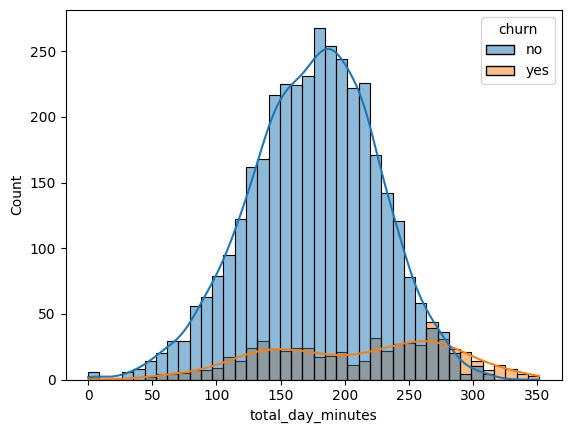

In [ ]:
sns.histplot(data=train, x='total_day_minutes', hue='churn', kde=True)

In [ ]:
train[train['churn'] == 'yes'].total_day_minutes.describe()

count    598.000000
mean     208.990134
std       69.183493
min        0.000000
25%      151.175000
50%      220.550000
75%      266.975000
max      351.500000
Name: total_day_minutes, dtype: float64

In [ ]:
train[train['churn'] == 'no'].total_day_minutes.describe()

count    3652.000000
mean      175.555093
std        49.549782
min         0.000000
25%       142.500000
50%       178.250000
75%       210.700000
max       313.800000
Name: total_day_minutes, dtype: float64

### Total Day Calls vs Churn
**Secara deskriptif**, tidak terdapat perbedaan yang signifikan antara pelanggan dengan status churn dan tidak churn dalam jumlah panggilan siang hari. Hal ini dapat dilihat dari distribusi variabel total day calls. Selain itu mean dan median pada variabel ini cenderung memiliki nilai yang sama baik untuk pelanggan dengan status churn dan tidak churn.

<Axes: xlabel='total_day_calls', ylabel='Count'>

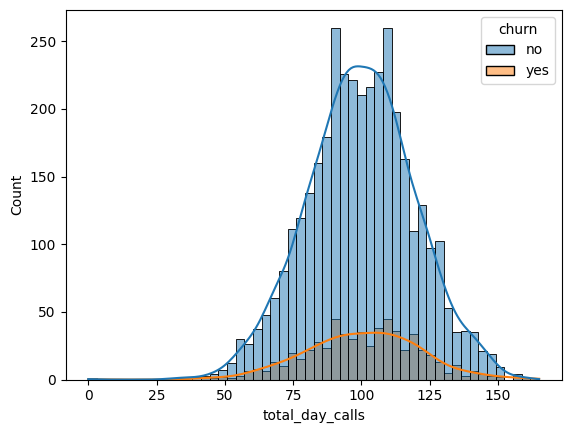

In [ ]:
sns.histplot(data=train, x='total_day_calls', hue='churn', kde=True)

In [ ]:
train[train['churn'] == 'yes'].total_day_calls.describe()

count    598.000000
mean     100.478261
std       20.988919
min        0.000000
25%       87.000000
50%      101.000000
75%      114.000000
max      165.000000
Name: total_day_calls, dtype: float64

In [ ]:
train[train['churn'] == 'no'].total_day_calls.describe()

count    3652.000000
mean       99.813801
std        19.659616
min         0.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       160.000000
Name: total_day_calls, dtype: float64

### Total Day Charge vs Churn
Berdasarkan histogram dibawah, pelanggan - pelanggan dengan total biaya panggilan siang hari yang cenderung mahal akan berpeluang untuk churn. Selanjutnya, ditinjau dari mean atau median pada variabel total day charge, pelanggan yang churn cenderung memiliki mean dan median yang lebih tinggi dari pada pelanggan yang tidak churn.


<Axes: xlabel='total_day_charge', ylabel='Count'>

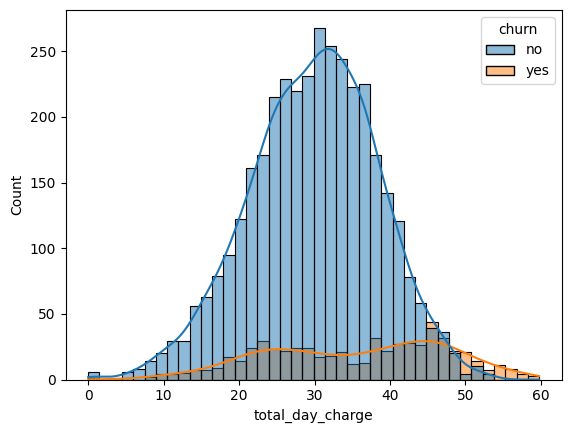

In [ ]:
sns.histplot(data=train, x='total_day_charge', hue='churn', kde=True)

In [ ]:
train.loc[train['churn'] == 'yes', 'total_day_charge'].describe()

count    598.000000
mean      35.528679
std       11.761417
min        0.000000
25%       25.697500
50%       37.495000
75%       45.385000
max       59.760000
Name: total_day_charge, dtype: float64

In [ ]:
train.loc[train['churn'] == 'no', 'total_day_charge'].describe()

count    3652.000000
mean       29.844948
std         8.423424
min         0.000000
25%        24.230000
50%        30.300000
75%        35.820000
max        53.350000
Name: total_day_charge, dtype: float64

### Total Eve Minutes vs Churn
Secara deskriptif, tidak terdapat perbedaan yang signifikan antara pelanggan dengan status churn dan tidak churn dalam jumlah menit panggilan dari petang hingga tengah malam. Hal ini dapat dilihat dari distribusi variabel total eve minutes. Selain itu, mean dan median pada variabel ini cenderung tidak berbeda signifikan baik untuk pelanggan dengan status churn dan tidak churn


<Axes: xlabel='total_eve_minutes', ylabel='Count'>

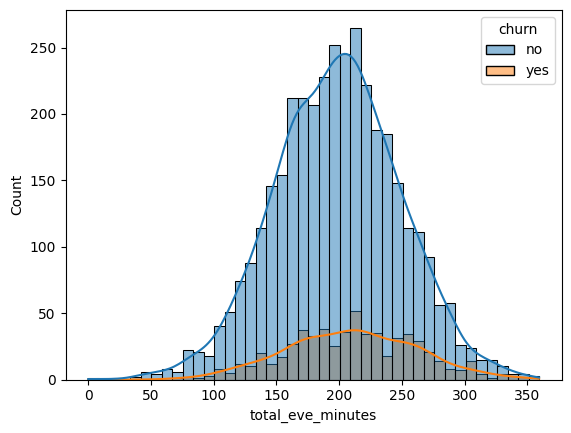

In [ ]:
sns.histplot(data=train, x='total_eve_minutes', hue='churn', kde=True)

In [ ]:
train.loc[train['churn'] == 'yes', 'total_eve_minutes'].describe()

count    598.000000
mean     209.964883
std       51.312321
min       70.900000
25%      172.150000
50%      210.200000
75%      248.100000
max      349.400000
Name: total_eve_minutes, dtype: float64

In [ ]:
train.loc[train['churn'] == 'no', 'total_eve_minutes'].describe()

count    3652.000000
mean      198.570674
std        49.897726
min         0.000000
25%       164.575000
50%       199.200000
75%       231.725000
max       359.300000
Name: total_eve_minutes, dtype: float64

### Total Eve Calls vs Churn
**Secara deskriptif**, tidak terdapat perbedaan yang signifikan antara pelanggan dengan status churn dan tidak churn dalam hal banyak panggilan dari petang hingga tengah malam. Hal ini dapat dilihat dari distribusi variabel total eve calls, mean, dan median yang cenderung sama baik untuk pelanggan dengan status churn dan tidak churn.

<Axes: xlabel='total_eve_calls', ylabel='Count'>

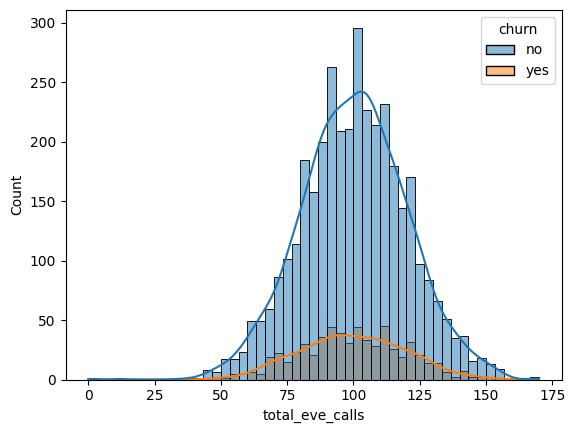

In [ ]:
sns.histplot(data=train, x='total_eve_calls', hue='churn', kde=True)

In [ ]:
train.loc[train['churn']== 'yes', 'total_eve_calls'].describe()

count    598.000000
mean      99.841137
std       19.752909
min       48.000000
25%       87.000000
50%       99.500000
75%      113.000000
max      168.000000
Name: total_eve_calls, dtype: float64

In [ ]:
train.loc[train['churn']== 'no', 'total_eve_calls'].describe()

count    3652.000000
mean      100.231380
std        19.936117
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: total_eve_calls, dtype: float64

### Total Eve Charge vs Churn
**Secara deskriptif**, tidak terdapat perbedaan yang signifikan antara pelanggan dengan status churn dan tidak churn dalam hal biaya panggilan dari petang hingga tengah malam. Hal ini dapat dilihat dari distribusi variabel total eve charge, mean, dan median yang cenderung sama baik untuk pelanggan dengan status churn dan tidak churn.

<Axes: xlabel='total_eve_charge', ylabel='Count'>

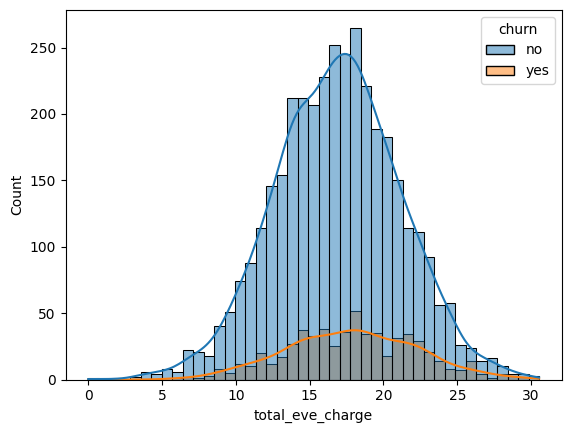

In [ ]:
sns.histplot(data=train, x='total_eve_charge', hue='churn', kde=True)

In [ ]:
train.loc[train['churn']=='yes', 'total_eve_charge'].describe()

count    598.000000
mean      17.847207
std        4.361545
min        6.030000
25%       14.635000
50%       17.870000
75%       21.090000
max       29.700000
Name: total_eve_charge, dtype: float64

In [ ]:
train.loc[train['churn']=='no', 'total_eve_charge'].describe()

count    3652.000000
mean       16.878743
std         4.241312
min         0.000000
25%        13.987500
50%        16.930000
75%        19.692500
max        30.540000
Name: total_eve_charge, dtype: float64

### Total Night Minutes vs Churn
Secara deskriptif, tidak terdapat perbedaan yang signifikan antara pelanggan dengan status churn dan tidak churn dalam hal jumlah panggilan dari tengah malam hingga sebelum dini hari dalam menit. Hal ini dapat dilihat dari distribusi variabel total night minutes yang cenderung sama untuk pelanggan dengan status churn dan tidak churn.


<Axes: xlabel='total_night_minutes', ylabel='Count'>

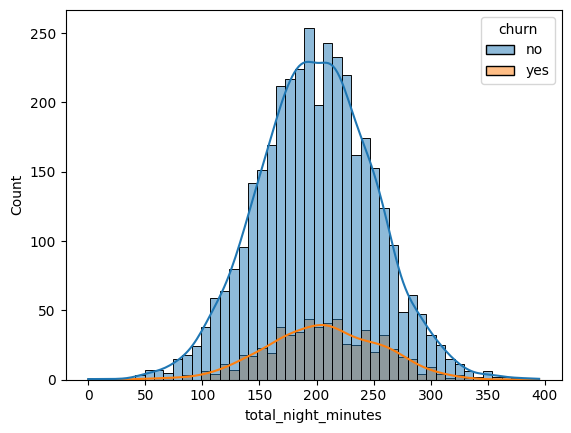

In [ ]:
sns.histplot(data=train, x='total_night_minutes', hue='churn', kde=True)

In [ ]:
train.loc[train['churn']=='yes', 'total_night_minutes'].describe()

count    598.000000
mean     206.331773
std       48.959820
min       47.400000
25%      172.825000
50%      206.100000
75%      241.250000
max      381.600000
Name: total_night_minutes, dtype: float64

In [ ]:
train.loc[train['churn']=='no', 'total_night_minutes'].describe()

count    3652.000000
mean      199.577519
std        50.521152
min         0.000000
25%       165.975000
50%       199.300000
75%       233.125000
max       395.000000
Name: total_night_minutes, dtype: float64

### Total Night Calls vs Churn
Secara deskriptif, tidak terdapat perbedaan yang signifikan antara pelanggan dengan status churn dan tidak churn dalam hal banyak panggilan dari tengah malam hingga sebelum dini hari. Hal ini dapat dilihat dari distribusi variabel total night calls, mean, dan median yang cenderung sama baik untuk pelanggan dengan status churn dan tidak churn.


<Axes: xlabel='total_night_calls', ylabel='Count'>

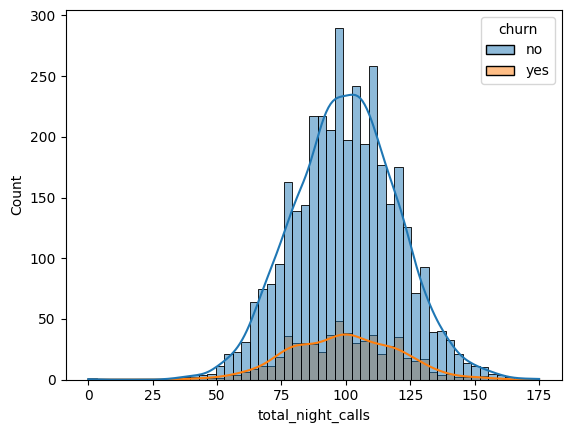

In [ ]:
sns.histplot(data=train, x='total_night_calls', hue='churn', kde=True)

In [ ]:
train.loc[train['churn']=='yes', 'total_night_calls'].describe()

count    598.000000
mean      99.209030
std       20.263378
min       42.000000
25%       84.000000
50%       99.000000
75%      114.000000
max      158.000000
Name: total_night_calls, dtype: float64

In [ ]:
train.loc[train['churn']=='no', 'total_night_calls'].describe()

count    3652.000000
mean       99.942771
std        20.066126
min         0.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: total_night_calls, dtype: float64

### Total Night Charge vs Churn
Secara deskriptif, tidak terdapat perbedaan yang signifikan antara pelanggan dengan status churn dan tidak churn dalam hal biaya panggilan dari tengah malam hingga sebelum dini hari yang dikeluarkan. Hal ini dapat dilihat dari distribusi variabel total night charge, mean, dan median yang cenderung sama baik untuk pelanggan dengan status churn dan tidak churn.


<Axes: xlabel='total_night_charge', ylabel='Count'>

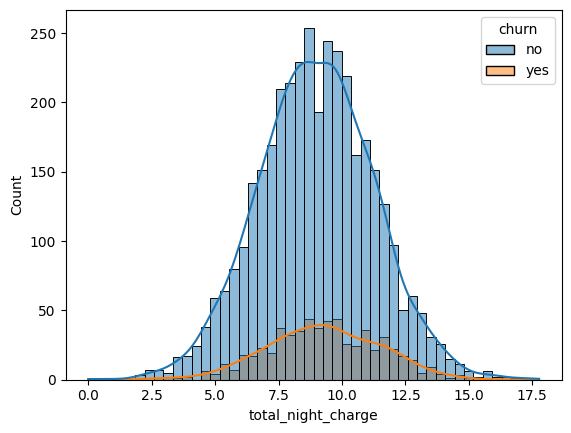

In [ ]:
sns.histplot(data=train, x='total_night_charge', hue='churn', kde=True)

In [ ]:
train.loc[train['churn']=='yes', 'total_night_charge'].describe()

count    598.000000
mean       9.285033
std        2.203215
min        2.130000
25%        7.780000
50%        9.275000
75%       10.857500
max       17.170000
Name: total_night_charge, dtype: float64

In [ ]:
train.loc[train['churn']=='no', 'total_night_charge'].describe()

count    3652.000000
mean        8.981131
std         2.273463
min         0.000000
25%         7.470000
50%         8.970000
75%        10.490000
max        17.770000
Name: total_night_charge, dtype: float64

### Total Intl Minutes vs Churn
Secara deskriptif, tidak terdapat perbedaan yang signifikan antara pelanggan dengan status churn dan tidak churn dalam hal panggilan internasional dalam menit. Hal ini dapat dilihat dari distribusi variabel total intl minutes, mean, dan median yang cenderung sama baik untuk pelanggan dengan status churn dan tidak churn.


<Axes: xlabel='total_intl_minutes', ylabel='Count'>

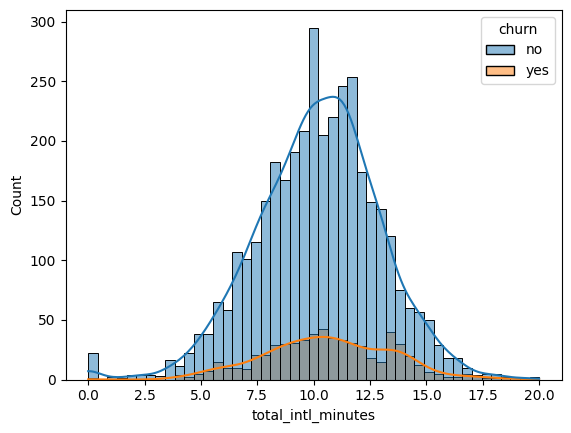

In [ ]:
sns.histplot(data=train, x='total_intl_minutes', hue='churn', kde=True)

In [ ]:
train[train['churn'] == 'yes'].total_intl_minutes.describe()

count    598.000000
mean      10.632441
std        2.794494
min        0.000000
25%        8.800000
50%       10.600000
75%       12.700000
max       20.000000
Name: total_intl_minutes, dtype: float64

In [ ]:
train[train['churn'] == 'no'].total_intl_minutes.describe()

count    3652.000000
mean       10.194441
std         2.749911
min         0.000000
25%         8.500000
50%        10.300000
75%        12.000000
max        19.700000
Name: total_intl_minutes, dtype: float64

### Total Intl Calls vs Churn
Berdasarkan histogram dibawah, pelanggan - pelanggan dengan jumlah panggilan internasional yang cenderung rendah akan berpeluang untuk churn.



<Axes: xlabel='total_intl_calls', ylabel='Count'>

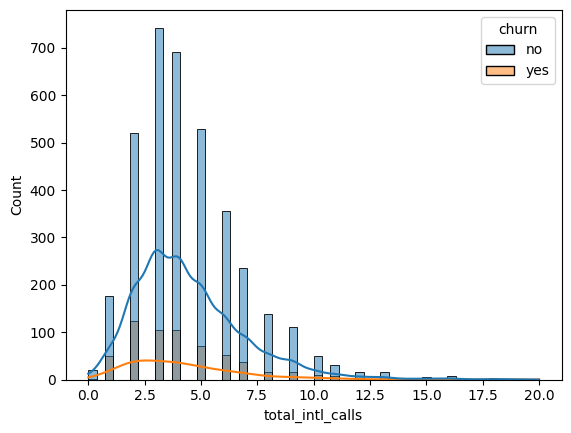

In [ ]:
sns.histplot(data=train, x='total_intl_calls', hue='churn', kde=True)

### Total Intl Charge vs Churn
Secara deskriptif, tidak terdapat perbedaan yang signifikan antara pelanggan dengan status churn dan tidak churn dalam hal biaya panggilan internasional yang dikeluarkan. Hal ini dapat dilihat dari distribusi variabel total intl charge, mean, dan median yang cenderung sama baik untuk pelanggan dengan status churn dan tidak churn.



<Axes: xlabel='total_intl_charge', ylabel='Count'>

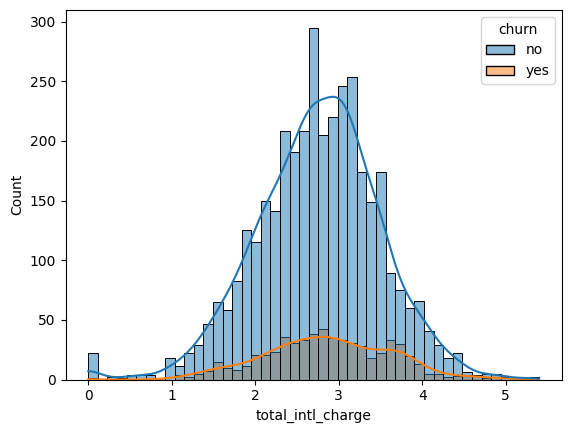

In [ ]:
sns.histplot(data=train, x='total_intl_charge', hue='churn', kde=True)

In [ ]:
train[train['churn'] == 'yes'].total_intl_charge.describe()

count    598.000000
mean       2.871254
std        0.754413
min        0.000000
25%        2.380000
50%        2.860000
75%        3.430000
max        5.400000
Name: total_intl_charge, dtype: float64

In [ ]:
train[train['churn'] == 'no'].total_intl_charge.describe()

count    3652.000000
mean        2.753018
std         0.742466
min         0.000000
25%         2.300000
50%         2.780000
75%         3.240000
max         5.320000
Name: total_intl_charge, dtype: float64

### Number Customer Service Calls vs Churn
Secara deskriptif, pelanggan-pelanggan dengan jumlah layanan panggilan yang cenderung banyak akan lebih berpeluang untuk churn.



<Axes: xlabel='number_customer_service_calls', ylabel='count'>

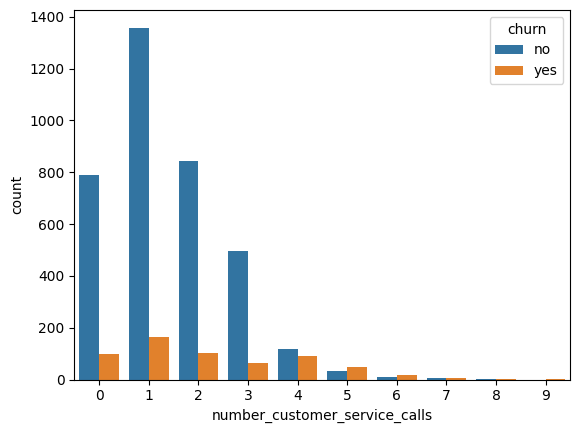

In [ ]:
sns.countplot(data=train, x='number_customer_service_calls', hue='churn')

In [ ]:
train[train['churn'] == 'yes'].number_customer_service_calls.describe()

count    598.000000
mean       2.275920
std        1.827334
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        9.000000
Name: number_customer_service_calls, dtype: float64

In [ ]:
train[train['churn'] == 'no'].number_customer_service_calls.describe()

count    3652.000000
mean        1.441676
std         1.165159
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: number_customer_service_calls, dtype: float64

## Outlier
Variabel numerik cenderung memiliki outlier. Misalkan setiap variabel numerik kita jumlahkan jumlah outliernya, maka proporsi outlier pada jumlah seluruh data dalam dataset sekitar 22.2%. Maka dari itu, agar tidak kehilangan banyak data dan meninjau bahwa dataset ini tidak terlalu memiliki banyak data, penulis mengatasi data outlier pada tingkat algoritma, dimana akan digunakan algoritma klasifikasi yang secara alami dapat mereduksi efek buruk outlier.

<Axes: >

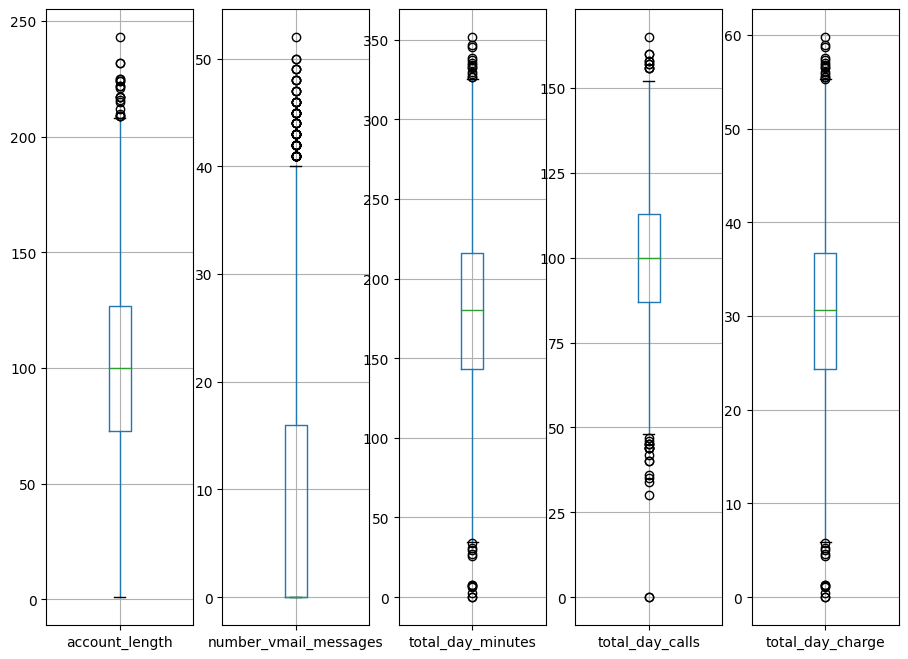

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(11, 8))

train.boxplot('account_length', ax=ax[0])
train.boxplot('number_vmail_messages', ax=ax[1])
train.boxplot('total_day_minutes', ax=ax[2])
train.boxplot('total_day_calls', ax=ax[3])
train.boxplot('total_day_charge', ax=ax[4])

<Axes: >

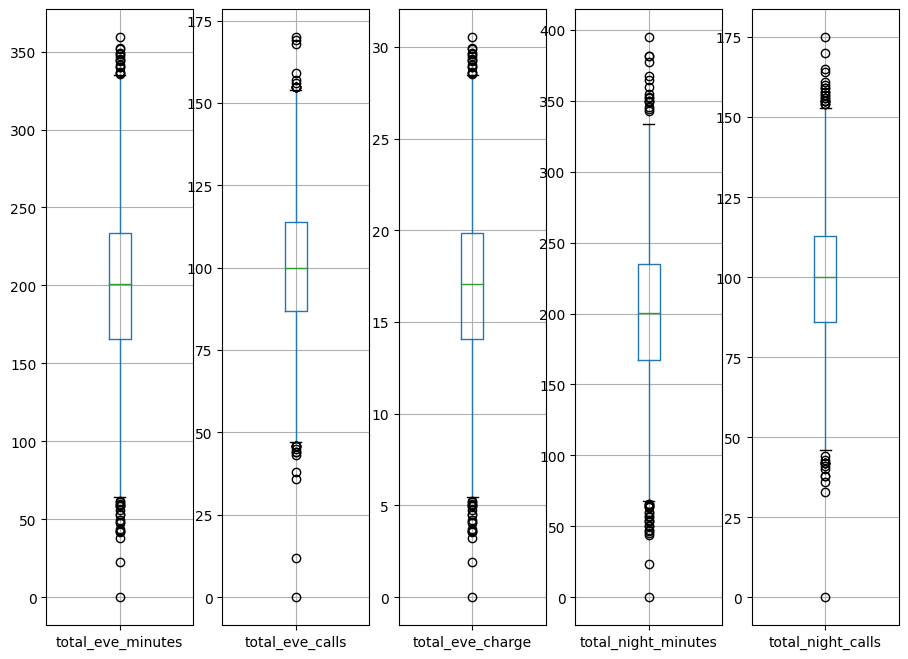

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(11, 8))

train.boxplot('total_eve_minutes', ax=ax[0])
train.boxplot('total_eve_calls', ax=ax[1])
train.boxplot('total_eve_charge', ax=ax[2])
train.boxplot('total_night_minutes', ax=ax[3])
train.boxplot('total_night_calls', ax=ax[4])

<Axes: >

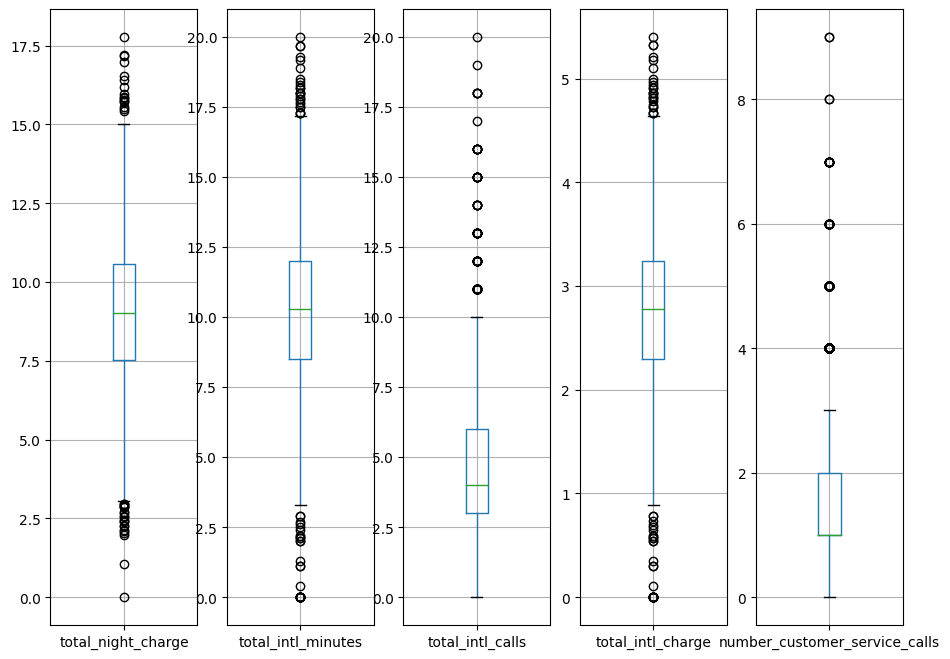

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(11, 8))

train.boxplot('total_night_charge', ax=ax[0])
train.boxplot('total_intl_minutes', ax=ax[1])
train.boxplot('total_intl_calls', ax=ax[2])
train.boxplot('total_intl_charge', ax=ax[3])
train.boxplot('number_customer_service_calls', ax=ax[4])

### Pengecekan proporsi outlier

In [ ]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [ ]:
find_outliers_IQR(train[num]).notnull().sum()

account_length                    20
number_vmail_messages             86
total_day_minutes                 25
total_day_calls                   28
total_day_charge                  26
total_eve_minutes                 34
total_eve_calls                   24
total_eve_charge                  34
total_night_minutes               37
total_night_calls                 33
total_night_charge                37
total_intl_minutes                62
total_intl_calls                 100
total_intl_charge                 62
number_customer_service_calls    335
dtype: int64

In [ ]:
# Perkiraan jumlah presentase outlier pada data
(((find_outliers_IQR(train[num]).notnull().sum()).sum())/len(train))*100

22.188235294117646

## Drop State
State memiliki kardinalitas yang tinggi sehingga didrop

In [ ]:
train.drop('state', axis=1, inplace = True)

## Encode Variable
- One Hot Encoding dilakukan pada variabel 'area_code', 'international_plan', 'voice_mail_plan' karena bertipe nominal.
- Label Encoder dilakukan pada variabel churn.

In [ ]:
train.columns

Index(['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churn'],
      dtype='object')

In [ ]:
categorical_value = ['area_code', 'international_plan', 'voice_mail_plan']
tr_dmy = pd.get_dummies(train, columns=categorical_value)
tr_dmy

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,3.70,1,no,0,1,0,1,0,0,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,3.29,0,no,0,1,0,1,0,1,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,1.78,2,no,1,0,0,0,1,1,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,2.73,3,no,0,1,0,0,1,1,0
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,...,2.03,3,no,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,188.3,70,32.01,243.8,88,20.72,213.7,79,...,2.78,0,no,0,1,0,1,0,1,0
4246,73,0,177.9,89,30.24,131.2,82,11.15,186.2,89,...,3.11,3,no,1,0,0,1,0,1,0
4247,75,0,170.7,101,29.02,193.1,126,16.41,129.1,104,...,1.86,1,no,1,0,0,1,0,1,0
4248,50,40,235.7,127,40.07,223.0,126,18.96,297.5,116,...,2.67,2,no,1,0,0,1,0,0,1


In [ ]:
# label encoder churn
label_encoder = LabelEncoder()
tr_dmy['churn'] = label_encoder.fit_transform(tr_dmy['churn'])

In [ ]:
tr_dmy

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,3.70,1,0,0,1,0,1,0,0,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,3.29,0,0,0,1,0,1,0,1,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,1.78,2,0,1,0,0,0,1,1,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,2.73,3,0,0,1,0,0,1,1,0
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,...,2.03,3,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,188.3,70,32.01,243.8,88,20.72,213.7,79,...,2.78,0,0,0,1,0,1,0,1,0
4246,73,0,177.9,89,30.24,131.2,82,11.15,186.2,89,...,3.11,3,0,1,0,0,1,0,1,0
4247,75,0,170.7,101,29.02,193.1,126,16.41,129.1,104,...,1.86,1,0,1,0,0,1,0,1,0
4248,50,40,235.7,127,40.07,223.0,126,18.96,297.5,116,...,2.67,2,0,1,0,0,1,0,0,1


## Splitting Dataset
20% data testing dan 80% data training

In [ ]:
X = tr_dmy.drop('churn', axis=1)
y = tr_dmy['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
154,93,0,271.6,71,46.17,229.4,108,19.50,77.3,121,...,3,2.94,2,0,1,0,1,0,1,0
2148,95,0,174.0,57,29.58,281.1,118,23.89,197.2,94,...,2,2.62,0,0,0,1,1,0,1,0
245,74,0,85.7,83,14.57,247.7,67,21.05,142.4,85,...,5,2.73,2,0,1,0,1,0,1,0
4227,81,0,234.1,105,39.80,237.4,88,20.18,240.6,85,...,4,3.08,1,0,1,0,1,0,1,0
548,139,0,138.1,103,23.48,164.5,100,13.98,134.9,63,...,2,2.24,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,177,0,84.9,77,14.43,257.5,109,21.89,210.5,66,...,5,2.03,2,1,0,0,1,0,1,0
3264,49,42,159.0,67,27.03,126.3,125,10.74,206.8,88,...,3,2.00,2,0,0,1,1,0,0,1
1653,126,26,129.3,123,21.98,176.5,114,15.00,154.5,102,...,7,2.59,1,0,1,0,0,1,0,1
2607,82,0,135.4,102,23.02,237.1,122,20.15,118.3,91,...,4,4.73,0,0,1,0,1,0,1,0


In [ ]:
X_test

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
2223,134,0,258.8,85,44.00,129.5,114,11.01,193.6,106,...,7,2.94,2,0,1,0,1,0,1,0
2175,110,0,208.0,69,35.36,95.1,94,8.08,178.5,129,...,11,2.16,1,0,0,1,1,0,1,0
220,114,28,225.8,94,38.39,193.0,117,16.41,232.4,100,...,9,2.27,4,0,0,1,1,0,0,1
1783,110,0,148.4,95,25.23,193.8,98,16.47,206.0,106,...,6,1.86,0,0,1,0,1,0,1,0
3632,88,0,141.7,102,24.09,226.2,125,19.23,100.1,93,...,8,3.21,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,110,0,135.1,109,22.97,205.2,99,17.44,166.3,119,...,4,3.16,1,0,1,0,1,0,1,0
2759,88,0,274.6,105,46.68,161.1,121,13.69,194.4,123,...,4,2.48,2,1,0,0,1,0,1,0
2239,63,21,151.5,99,25.76,147.8,89,12.56,210.4,114,...,4,2.70,1,1,0,0,0,1,0,1
3977,97,0,87.1,110,14.81,202.1,110,17.18,137.9,89,...,4,3.89,2,0,1,0,1,0,1,0


## Standarisasi
- Standarisasi dilakukan agar variabel numerik memiliki skala yang sama.
- Percobaan dilakukan dengan menggunakan metode standarisasi, yaitu StandardScaler dan RobustScaler. Ditinjau dari metrik evaluasi, pada kasus ini metode StandardScaler memberikan performa yang lebih baik daripada RobustScaler. Maka penulis, memilih standarisasi dengan metode StandardScaler.

In [ ]:
sc = StandardScaler()
X_train[num] = sc.fit_transform(X_train[num])
X_test[num] = sc.transform(X_test[num])

## Imbalance Handling
SMOTE + ENN adalah teknik hibrid dimana lebih banyak pengamatan yang tidak dihapus dari ruang sampel. Di sini, ENN adalah teknik undersampling lainnya di mana tetangga terdekat dari masing-masing kelas mayoritas diestimasi. Jika tetangga terdekat salah mengklasifikasikan contoh tertentu dari kelas mayoritas, maka contoh tersebut akan dihapus. Mengintegrasikan teknik ini dengan data oversampling yang dilakukan oleh SMOTE membantu dalam melakukan pembersihan data secara ekstensif. Hal ini menghasilkan pemisahan kelas yang lebih jelas dan ringkas (Satpathy, 2023).

In [ ]:
y_train.value_counts()

0    2917
1     483
Name: churn, dtype: int64

In [ ]:
from imblearn.combine import SMOTEENN
smote_nn = SMOTEENN(sampling_strategy = 0.8, random_state=0)
X_resampled, y_resampled = smote_nn.fit_resample(X_train, y_train)

In [ ]:
y_resampled.value_counts()

1    2260
0    2123
Name: churn, dtype: int64

<Axes: >

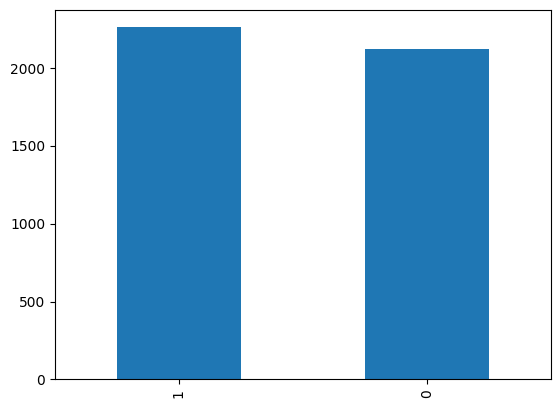

In [ ]:
y_resampled.value_counts().plot(kind='bar')

SMOTEENN dilakukan pada data training dengan sampling strategi = 0.8, hasilnya membuat kelas menjadi sembang. Setelah melalui seluruh tahap data preprocessing langkah selanjutnya yaitu tahap pemodelan yang akan dibahas pada slide berikutnya.

# Modelling

**Algoritma Klasifikasi**
1. **XGBoost**

XGBoost (eXtreme Gradient Boosting) adalah algoritma machine learning yang memiliki performa tinggi dan sangat efektif dalam prediksi. Dengan teknik boosting dan optimisasi berdasarkan gradien fungsi objektif, XGBoost menghasilkan model yang kuat dan akurat. Selain itu, algoritma ini dapat menangani data yang tidak seimbang dan mengidentifikasi fitur-fitur yang saling berinteraksi. Kelebihan ini menjadikan XGBoost pilihan populer dalam kompetisi machine learning dan analisis data.

2. **Gradien Boosting**

Gradient Boosting adalah algoritma machine learning yang menggabungkan beberapa model lemah menjadi model yang kuat. Kelebihannya terletak pada kemampuannya dalam menangani data kompleks dengan noise atau kesalahan. Dengan mengoptimalkan fungsi objektif berdasarkan gradien pada setiap titik, Gradient Boosting membangun model secara iteratif dan menghasilkan prediksi yang akurat.

**Why XGBoost and Gradien Boosting can reduce negative impact of Outliers?**
1. **XGBoost**

XGBoost adalah implementasi populer dari gradient boosting yang dikenal karena kecepatan dan akurasinya. XGBoost juga menyertakan sejumlah fitur yang membuatnya lebih kuat terhadap outlier, seperti kemampuan untuk menentukan pengurangan kerugian minimum untuk setiap pohon (ncrefe, 2023).

2. **Gradien Boosting**

Gradient boosting adalah algoritma boosting lain yang dikenal kuat terhadap outlier. Hal ini karena gradient boosting cocok dengan serangkaian pohon keputusan pada data, dan pohon keputusan secara alami kuat terhadap outlier (ncrefe, 2023).

## 1. XGBoost

### Model Base
Menggunakan seluruh fitur kecuali state

In [ ]:
xb = xgb.XGBClassifier()

In [ ]:
xb.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xb = xb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_xb))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       735
           1       0.79      0.83      0.81       115

    accuracy                           0.95       850
   macro avg       0.88      0.90      0.89       850
weighted avg       0.95      0.95      0.95       850



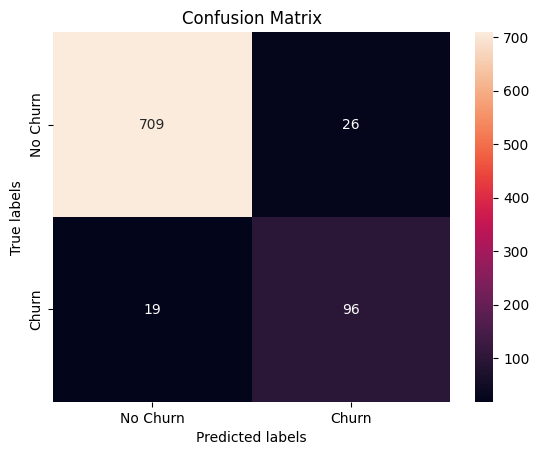

In [ ]:
cm = confusion_matrix(y_test, y_pred_xb)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Churn', 'Churn']); ax.yaxis.set_ticklabels(['No Churn', 'Churn']);

### Hyperparameter Tuning - Cross Validation

In [ ]:
# define model
# parameters
parameter=[
    {'learning_rate': [0.05, 0.10, 0.15],
    'max_depth': [5, 6, 8],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.5, 0.8],
    'colsample_bytree': [0.25, 0.5]}
    ]

# create 10 folds
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#define search
search = GridSearchCV(xb, parameter, cv=folds, refit=True, verbose=2, scoring='f1', n_jobs=-1 )

# execute search
result = search.fit(X_resampled, y_resampled)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


In [ ]:
# hasil
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9782170517874411
Best Hyperparameters: {'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 8, 'min_child_weight': 1, 'subsample': 0.8}


In [ ]:
xg = xgb.XGBClassifier(colsample_bytree = 0.5, learning_rate = 0.15,
                     max_depth=8, min_child_weight = 1, subsample=0.8)

In [ ]:
xg.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred_xgb = xg.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       735
           1       0.82      0.83      0.83       115

    accuracy                           0.95       850
   macro avg       0.90      0.90      0.90       850
weighted avg       0.95      0.95      0.95       850



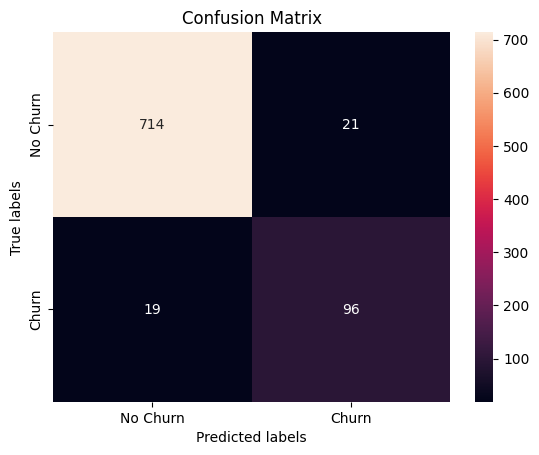

In [ ]:
cm = confusion_matrix(y_test, pred_xgb)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Churn', 'Churn']); ax.yaxis.set_ticklabels(['No Churn', 'Churn']);

## 2. Gradien Boosting

### Model Base

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
gb.fit(X_resampled, y_resampled)

GradientBoostingClassifier()

In [ ]:
pred_gb = gb.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       735
           1       0.67      0.83      0.74       115

    accuracy                           0.92       850
   macro avg       0.82      0.89      0.85       850
weighted avg       0.93      0.92      0.93       850



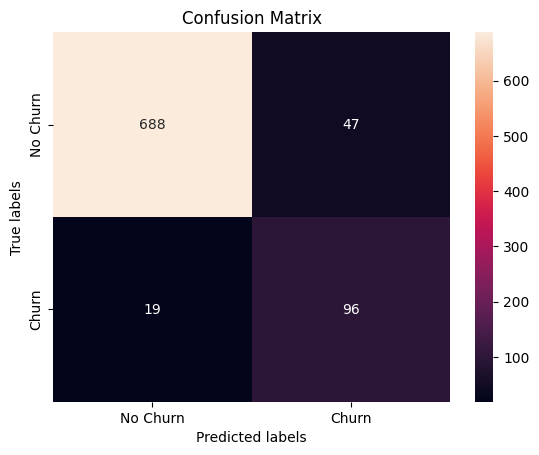

In [ ]:
cm = confusion_matrix(y_test, pred_gb)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Churn', 'Churn']); ax.yaxis.set_ticklabels(['No Churn', 'Churn']);

### Hyperparameter Tuning - Cross Validation

In [ ]:
# parameters
parameter=[{'loss' : ['exponential'],
            'learning_rate': [0.01, 0.1, 1],
            'n_estimators': [50, 100, 200],
            'max_depth': [2, 3, 4],
            'min_samples_leaf': [1, 3],
            'max_features' : ['log2']}]

# create 10 folds
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#define search
search = GridSearchCV(gb, parameter, cv=folds, scoring='f1')

# execute search
result = search.fit(X_resampled, y_resampled)

In [ ]:
# hasil
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9774524510766247
Best Hyperparameters: {'learning_rate': 1, 'loss': 'exponential', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 200}


In [ ]:
gbh = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', max_depth = 4,
                                 max_features = 'log2', min_samples_leaf = 1, n_estimators = 200)
gbh.fit(X_resampled,y_resampled)

y_pred_gbh=gbh.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_gbh))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       735
           1       0.76      0.81      0.78       115

    accuracy                           0.94       850
   macro avg       0.86      0.88      0.87       850
weighted avg       0.94      0.94      0.94       850



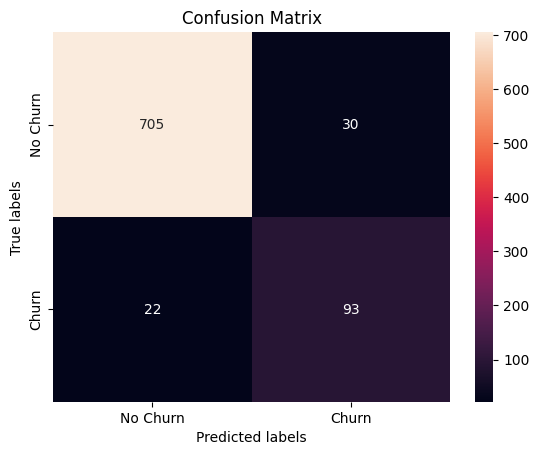

In [ ]:
cm = confusion_matrix(y_test, y_pred_gbh)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Churn', 'Churn']); ax.yaxis.set_ticklabels(['No Churn', 'Churn']);

## Pemilihan Model Terbaik
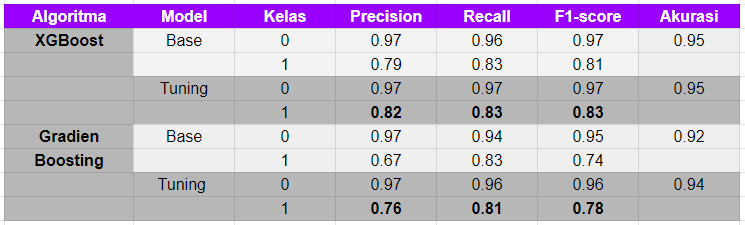

- Biaya mempertahankan pelanggan yang sudah ada jauh lebih rendah daripada mengakuisisi pelanggan baru. Maka dari itu, meminimkan False Negative atau kondisi dimana membiarkan pelanggan berhenti berlangganan harus diminimumkan karena dapat menghemat biaya yang dikeluarkan.
- Berdasarkan confusion matrix diatas, dari 850 pelanggan, melalui algoritma XGBoost dan Gradien Bossting secara berurutan terdapat kesalahan klasifikasi pelanggan sebanyak 40 dan 52.  Dimana, pada algoritma XGBoost memiliki False Negative yang lebih rendah dari pada Gradien Boosting.
- Maka dari itu, ditinjau dari performa model dan peluang penghematan biaya, dipilih **model dengan Algoritma XGBoost yang telah melalui tahap hyperparameter tuning dan cross validation sebagai model terbaik**. Model ini memiliki parameter colsample_bytree = 0.5, learning_rate = 0.15, max_depth=8, min_child_weight = 1, subsample=0.8

# Feature Importance
Menggunakan Best Model.

In [ ]:
explainer = shap.Explainer(xg)
shap_values = explainer.shap_values(X_test)

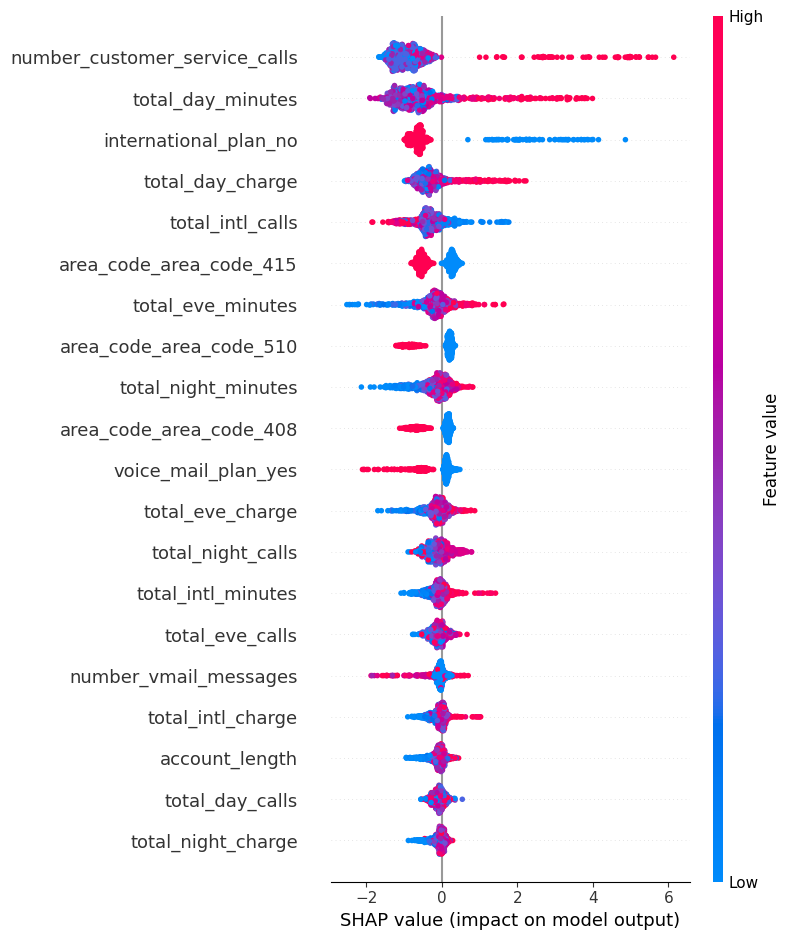

In [ ]:
shap.summary_plot(shap_values, X_test)

# Insight by Feature Importance
Top 5 Feature yang berpengaruh terhadap customer churn:
1. Number customer service calls

    Pelanggan-pelanggan yang memiliki jumlah layanan panggilan yang cenderung banyak akan lebih berpeluang untuk churn.
2.  Total days minutes

    Pelanggan - pelanggan dengan jumlah panggilan siang hari dalam menit yang cenderung tinggi akan berpeluang untuk churn.
3.  International_plan_no

    Pelanggan - pelanggan yang memiliki paket panggilan internasional cenderung berpeluang untuk churn.
4.  Total day charge

    Pelanggan-pelanggan dengan total biaya panggilan siang hari yang mahal berpeluang untuk churn.
5.  Total intl calls

    Pelanggan-pelanggan dengan jumlah panggilan internasional yang cenderung rendah berpeluang untuk churn.

# Recommendation
1. Meningkatkan kualitas layanan pelanggan serta memperkenalkan solusi mandiri seperti basis pengetahuan online atau alat bantuan otomatis untuk mengurangi jumlah panggilan layanan yang diperlukan.
2. Melakukan promosi atau diskon khusus untuk paket panggilan internasional, serta memberikan informasi yang lebih jelas dan menarik tentang manfaat yang diperoleh dengan menggunakan paket ini.
3. Memberikan diskon atau penawaran khusus bagi pelanggan yang menggunakan layanan secara intensif di siang hari, serta mengevaluasi kebutuhan dan preferensi pelanggan untuk menyesuaikan paket yang ditawarkan.

# Predict Status Churn dalam unseen data
dilakuakan preprocessing data seperti data pelatihan. Setelah itu memprediksi status churn berdasarkan best model.

## Drop id dan state pada data test

In [ ]:
test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [ ]:
# simpan dalam objek unseen_data
unseen_data = test.drop(['id', 'state'], axis=1)

In [ ]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 750 non-null    int64  
 1   area_code                      750 non-null    object 
 2   international_plan             750 non-null    object 
 3   voice_mail_plan                750 non-null    object 
 4   number_vmail_messages          750 non-null    int64  
 5   total_day_minutes              750 non-null    float64
 6   total_day_calls                750 non-null    int64  
 7   total_day_charge               750 non-null    float64
 8   total_eve_minutes              750 non-null    float64
 9   total_eve_calls                750 non-null    int64  
 10  total_eve_charge               750 non-null    float64
 11  total_night_minutes            750 non-null    float64
 12  total_night_calls              750 non-null    int

## Encode Variabel

In [ ]:
categorical_value = ['area_code', 'international_plan', 'voice_mail_plan']
dmy = pd.get_dummies(unseen_data, columns=categorical_value)
dmy

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,3,2.70,1,0,1,0,1,0,0,1
1,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,6,1.70,0,0,0,1,0,1,1,0
2,62,0,120.7,70,20.52,307.2,76,26.11,203.0,99,...,6,3.54,4,0,1,0,1,0,1,0
3,93,0,190.7,114,32.42,218.2,111,18.55,129.6,121,...,3,2.19,3,0,0,1,1,0,1,0
4,174,0,124.3,76,21.13,277.1,112,23.55,250.7,115,...,5,4.19,3,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,0,119.4,99,20.30,226.3,97,19.24,202.7,111,...,7,3.05,0,0,1,0,1,0,1,0
746,73,0,177.2,118,30.12,270.5,84,22.99,241.8,112,...,2,3.32,3,1,0,0,1,0,1,0
747,152,0,184.2,90,31.31,256.8,73,21.83,213.6,113,...,2,3.97,3,0,1,0,1,0,1,0
748,61,0,140.6,89,23.90,172.8,128,14.69,212.4,97,...,4,3.67,1,0,1,0,1,0,1,0


## Standarisasi

In [ ]:
dmy[num] = sc.transform(dmy[num])

## Predict X_test
diprediksi dengan best model

In [ ]:
pred_value = xg.predict(dmy.values)

In [ ]:
data_prediction = pd.DataFrame()
data_prediction

""


In [ ]:
data_prediction['id'] = test['id']
data_prediction['y'] = pred_value

In [ ]:
data_prediction

,id,y
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
745,746,0
746,747,0
747,748,0
748,749,0


In [ ]:
# ekspor to csv
data_prediction.to_csv('DataChurn_Prediction.csv', index = False)

In [ ]:
# data full yang terdiri dari seluruh fitur
test['y'] = pred_value

In [ ]:
test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,y
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,1
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,...,97,19.24,202.7,111,9.12,11.3,7,3.05,0,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,...,84,22.99,241.8,112,10.88,12.3,2,3.32,3,0
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,0
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0


In [ ]:
# eksport full dataset prediction
test.to_csv('Churn_Full_Data.csv', index = False)

# Daftar Pustaka
Meanderings, A. T.-T. (2020). SHAP - What Is Your Model Telling You? Interpret CatBoost Regression and Classification Outputs. Youtube. https://www.youtube.com/watch?v=ZkIxZ5xlMuI&t=3s

Ncrefe. (2023). Robust Algorithms to Outliers. Medium. https://medium.com/@mefeincir/robust-algorithms-to-outliers-c13ebb51494

Satpathy, S. (2023). SMOTE for Imbalanced Classification with Python. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

